In [2]:
%matplotlib notebook
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Feb 16 2019 13:25:19
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [4]:
def rotate(theta, index):
    x_ = sim.particles[index].x * np.cos(theta) - sim.particles[index].y* np.sin(theta)
    y_ = sim.particles[index].x * np.sin(theta) + sim.particles[index].y* np.cos(theta)
    return x_ , y_
    
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


sim.t = 0
sim.move_to_com()
Noutputs = 30000
years = 500.
#position in co-rotating frame
sun_pos = np.zeros((Noutputs,2))
earth_pos = np.zeros((Noutputs,2))
cruithne_pos = np.zeros((Noutputs,2))
times = np.zeros(Noutputs)
i = 0


x_earth = sim.particles[3].x
y_earth = sim.particles[3].y
z_earth = sim.particles[3].z
pos = (sim.particles[3].x, sim.particles[3].y)
theta = 0
for time in np.linspace(0,years,Noutputs):
    #print(time)
    
    sim.integrate(time)
    new_x_earth = sim.particles[3].x
    new_y_earth = sim.particles[3].y
    new_z_earth = sim.particles[3].z
    new_pos = (sim.particles[3].x, sim.particles[3].y)
    
    #theta = 2*np.arcsin( (np.sqrt((new_x_earth-x_earth)**2 + (new_y_earth-y_earth)**2)/2 ) \
                        #/np.sqrt(new_x_earth**2 + new_y_earth**2))    
        
    theta -= angle_between(pos,new_pos)    
    print(theta)
    angle = theta % (2*np.pi)
    earth_pos[i] = rotate(angle, 3)
    sun_pos[i] =  rotate(angle, 0)
    cruithne_pos[i] = rotate(angle, 5)
    
    x_earth = new_x_earth
    y_earth = new_y_earth
    z_earth = new_z_earth
    pos = new_pos
    #energy_deltas[i] = sim.calculate_energy()- energy_0
    times[i] = time
    i += 1
#print(sun_pos)
#print(earth_pos)
#print(cruithne_pos)


0.0
-0.10619535995567471
-0.2121287655208659
-0.31778777215019033
-0.4231632444315005
-0.5282494008396648
-0.6330438150142047
-0.7375473766729277
-0.8417642150419625
-0.9457015884055934
-1.0493697437785352
-1.1527817507385878
-1.2559533133291965
-1.3589025637028724
-1.4616498408444005
-1.564217457320051
-1.6666294566061266
-1.7689113631606659
-1.871089926949765
-1.9731928637011316
-2.075248591851103
-2.1772859669678817
-2.279334014333226
-2.381421660281308
-2.483577462733401
-2.5858293414102396
-2.6882043090244596
-2.7907282053589215
-2.8934254356181386
-2.996318714329685
-3.099428816652592
-3.2027743394753387
-3.306371475105127
-3.410233800679279
-3.514372086670401
-3.6187941280729907
-3.723504602033877
-3.828504955773783
-3.9337933286101205
-4.039364511711665
-4.145209948884747
-4.251317781219533
-4.357672937803024
-4.464257273490756
-4.571049753040533
-4.678026681724642
-4.785161981349177
-4.892427507274485
-4.999793401716058
-5.1072284779133765
-5.214700628647994
-5.322177251743065

-46.157658908818675
-46.258555496223124
-46.35952485837691
-46.46060469521869
-46.56183184182545
-46.66324196380827
-46.76486925037827
-46.866746105025086
-46.968902834554264
-47.07136733799204
-47.17416479767254
-47.277317375658775
-47.38084391950048
-47.484759682277826
-47.58907606290512
-47.69380037362762
-47.79893564206738
-47.90448045391128
-48.010428838267835
-48.1167701938808
-48.22348926010069
-48.330566151024954
-48.43797647380511
-48.54569153850098
-48.65367865301776
-48.76190149371482
-48.87032054560337
-48.97889360641422
-49.08757634679508
-49.19632291644936
-49.30508658389267
-49.413820395926535
-49.52247784199478
-49.631013508324386
-49.73938370715124
-49.84754706735839
-49.9554650744694
-50.06310255006343
-50.17042806282785
-50.27741426501936
-50.38403815131919
-50.490281241210106
-50.59612968683037
-50.70157430961814
-50.80661057120772
-50.911238485334806
-51.01546247816828
-51.11929120473984
-51.222737329056
-51.3258172751067
-51.428550955397384
-51.53096148291254
-51.

-97.44033692088668
-97.54380108037917
-97.64764211415726
-97.75187299064578
-97.85650267585635
-97.96153591773846
-98.06697307123505
-98.17280996823989
-98.27903783131356
-98.38564323051898
-98.49260809374088
-98.5999097916198
-98.70752131269295
-98.81541152755678
-98.9235455329755
-99.03188506820325
-99.14038899733319
-99.24901385052522
-99.35771441473446
-99.4664443622716
-99.57515690370126
-99.68380545041191
-99.79234427174856
-99.90072913194734
-100.00891789301302
-100.11687107021373
-100.22455232909924
-100.33192891742831
-100.43897202626997
-100.54565707630641
-100.6519639285327
-100.75787702090487
-100.86338543434944
-100.96848289306321
-101.07316770517376
-101.17744265057604
-101.28131482313393
-101.3847954344763
-101.48789958640428
-101.59064601851661
-101.69305683702909
-101.79515722996008
-101.89697517302449
-101.99854112967391
-102.0998877476549
-102.20104955376276
-102.30206264852106
-102.40296440199174
-102.5037931506507
-102.60458789464727
-102.7053879946798
-102.8062328

-149.5085647149099
-149.61621819762638
-149.723979879669
-149.83181393481982
-149.93968360531235
-150.04755169786813
-150.15538108917067
-150.2631352309414
-150.3707786434775
-150.4782773877717
-150.58559950726178
-150.6927154312392
-150.799598333221
-150.9062244390667
-151.0125732812013
-151.11862789690073
-151.22437497013254
-151.32980491786958
-151.43491192307823
-151.53969391767515
-151.64415251953514
-151.7482929281049
-151.8521237832707
-151.95565699198775
-152.0589075277405
-152.16189320843168
-152.26463445727197
-152.36715405020541
-152.46947685308055
-152.57162955142113
-152.67364037510958
-152.77553881972315
-152.87735536574306
-152.97912119646168
-153.0808679151749
-153.18262726207172
-153.28443083110025
-153.38630978708392
-153.48829458348578
-153.59041468142232
-153.69269827079384
-153.79517199471888
-153.89786067877773
-154.00078706670115
-154.10397156432248
-154.2074319949525
-154.3111833702756
-154.4152376799241
-154.51960370304613
-154.62428684610737
-154.7292890115241

-199.99167170372112
-200.10020401273385
-200.20874856192725
-200.31726099171638
-200.42569740656256
-200.53401498432714
-200.6421725629748
-200.75013119220696
-200.85785463892512
-200.96530983713745
-201.07246727493091
-201.17930131333344
-201.2857904341864
-201.39191741644677
-201.49766944248034
-201.60303813762016
-201.70801954727145
-201.81261405677546
-201.91682626118157
-202.02066479272574
-202.12414211271027
-202.22727427408773
-202.3300806609351
-202.43258371049453
-202.5348086227303
-202.6367830615635
-202.73853685115222
-202.8401016698301
-202.9415107436581
-203.0427985409789
-203.1440004688026
-203.24515257135025
-203.34629123072926
-203.4474528694968
-203.54867365475366
-203.64998920338206
-203.75143428802104
-203.85304254328196
-203.9548461720532
-204.05687565295176
-204.15915945039777
-204.26172372833128
-204.36459206912056
-204.4677852002327
-204.57132073206228
-204.67521291097148
-204.77947239215882
-204.88410603749904
-204.98911674394432
-205.094503308381
-205.200260334

-244.524320303604
-244.63189114182342
-244.73919709112644
-244.84620934882622
-244.95290281808414
-245.05925635118965
-245.16525292668913
-245.27087976195244
-245.37612836436054
-245.48099452535175
-245.58547826186407
-245.68958371042035
-245.79331898079178
-245.89669597585888
-245.99973018302688
-246.10244044233445
-246.2048486961755
-246.30697972498677
-246.4088608725689
-246.5105217640056
-246.61199401846076
-246.713310958491
-246.81450731697234
-246.91561894228826
-247.01668250198185
-247.1177351846795
-247.21881439985594
-247.31995747490362
-247.42120134897243
-247.52258226312279
-247.62413544639153
-247.72589479747108
-247.82789256250945
-247.93015901086014
-248.0327221108331
-248.13560720753517
-248.23883670593565
-248.34242976356515
-248.44640199841947
-248.5507652186616
-248.65552718134415
-248.7606913868085
-248.86625691238478
-248.97221828454605
-249.07856539031334
-249.18528344169724
-249.29235301608253
-249.39975018517416
-249.50744672976788
-249.61541043298496
-249.723605

-293.5912912414824
-293.6983945404005
-293.80577032332667
-293.91338868550605
-294.02121657129373
-294.1292181705326
-294.23735536963864
-294.34558825010765
-294.45387562534427
-294.562175605186
-294.6704461763447
-294.7786457862842
-294.8867339178494
-294.9946716422861
-295.10242213914825
-295.20995117296997
-295.3172275181388
-295.42422332448473
-295.5309144182592
-295.63728053711844
-295.74330549893955
-295.84897730506646
-295.9542881806504
-296.0592345563536
-296.1638169966937
-296.2680400809634
-296.3719122430023
-296.4754455761502
-296.57865560949864
-296.6815610611569
-296.78418357372686
-296.8865474365438
-296.98867929847177
-297.09060787428945
-297.19236364706717
-297.2939785683672
-297.39548575752127
-297.4969192006037
-297.59831344944774
-297.69970332148694
-297.80112360119966
-297.90260874311565
-298.0041925761021
-298.1059080089678
-298.207786737712
-298.30985895505654
-298.41215306331975
-298.5146953921557
-298.61750992323334
-298.72061802463327
-298.8240381984741
-298.92

-340.5639476570394
-340.6663781701065
-340.7685155865295
-340.8703880436235
-340.9720259404306
-341.07346163021356
-341.1747291132349
-341.275863730978
-341.37690186218174
-341.47788062089535
-341.5788375570346
-341.6798103593458
-341.78083655985745
-341.8819532388563
-341.983196729681
-342.0846023228201
-342.1862039690637
-342.2880339818601
-342.39012273944536
-342.4924983877866
-342.5951865459697
-342.69821001633846
-342.80158850242765
-342.90533833848895
-343.0094722351738
-343.11399904667854
-343.21892356533124
-343.3242463498582
-343.4299635932383
-343.53606703741315
-343.6425439427627
-343.7493771175661
-343.8565450121217
-343.9640218816871
-344.07177802074443
-344.17978006911704
-344.2879913882987
-344.39637250405696
-344.5048816090184
-344.61347511665616
-344.722108256016
-344.83073569476056
-344.9393121768314
-345.0477931603715
-345.15613544147925
-345.26429774906956
-345.3722412969732
-345.47993028332706
-345.58733232851836
-345.69441884406825
-345.8011653280573
-345.90755158

-389.0356081365615
-389.142786605943
-389.24975014397404
-389.3564731321404
-389.4629329751133
-389.5691103488663
-389.6749893893503
-389.7805578137065
-389.88580697741304
-389.99073188525733
-390.0953311714791
-390.1996070501482
-390.3035652310338
-390.4072147998774
-390.51056806621386
-390.6136403835507
-390.7164499467145
-390.81901757059063
-390.9213664538582
-391.023521930678
-391.1255112125055
-391.22736312175874
-391.32910781938295
-391.43077652811496
-391.5324012521858
-391.63401449372356
-391.73564896618467
-391.8373373051797
-391.939111777053
-392.04100398565646
-392.14304457798664
-392.245262949677
-392.34768695164695
-392.45034259957083
-392.55325378827797
-392.65644201367536
-392.7599261052669
-392.8637219728059
-392.9678423710577
-393.0722966870319
-393.17709075412824
-393.2822266974062
-393.3877028152969
-393.49351350399365
-393.599649228791
-393.70609654609945
-393.8128381799961
-393.9198531562686
-394.02711699556517
-394.13460196575403
-394.2422773919319
-394.3501100207

-441.80749616300807
-441.908873307172
-442.01019847551356
-442.1115070244407
-442.2128344006282
-442.31421584091146
-442.41568607308216
-442.51727901754623
-442.61902748995186
-442.72096290514503
-442.8231149831511
-442.92551145827434
-443.02817779265285
-443.1311368959056
-443.2344088539861
-443.33801067154377
-443.44195603137393
-443.5462550748506
-443.65091420836984
-443.75593594139417
-443.8613187618383
-443.9670570545065
-444.07314106807445
-444.1795569356388
-444.2862867531027
-444.39330871861625
-444.5005973349602
-444.6081236751878
-444.71585571010604
-444.8237586943928
-444.931795605939
-445.03992763011695
-445.1481146808057
-445.2563159492124
-445.36449046814585
-445.4725976794303
-445.5805979924806
-445.68845332230785
-445.79612759596137
-445.9035872176013
-446.0108014839313
-446.1177429435015
-446.22438769530964
-446.33071562408145
-446.43671057152454
-446.54236044465097
-446.64765726384826
-446.7525971545766
-446.85718028719833
-446.96141076975096
-447.0652964996412
-447.1

-493.18737442951556
-493.2894982265452
-493.39195104008985
-493.4947580592169
-493.59794128986465
-493.70151925821114
-493.8055067270851
-493.9099144309869
-494.01474883610354
-494.1200119324181
-494.22570106554895
-494.33180881625543
-494.43832293553913
-494.54522634292374
-494.6524971947949
-494.76010902834105
-494.86803098402527
-494.97622810843416
-495.08466173853566
-495.1932899632426
-495.30206815553123
-495.41094956636897
-495.51988596904636
-495.62882834021065
-495.7377275621465
-495.8465351297534
-495.95520384529425
-496.0636884843735
-496.1719464177469
-496.27993817540363
-496.38762794180553
-496.4949839740755
-496.6019789379667
-496.70859015897287
-496.81479978829367
-496.9205948872235
-497.02596743622325
-497.1309142751558
-497.23543698209744
-497.33954169915836
-497.443238914024
-497.54654320571024
-497.6494729625073
-497.7520500793542
-497.85429964100604
-497.95624959640986
-498.0579304287781
-498.1593748249226
-498.26061734644907
-498.36169410453715
-498.4626424393157
-4

-539.9394582839591
-540.0466422224993
-540.1536069418285
-540.2603269869425
-540.3667800005624
-540.4729469424399
-540.5788122451117
-540.6843639225953
-540.7895936431233
-540.8944967635133
-540.9990723191299
-541.1033229686552
-541.2072548973325
-541.3108776838606
-541.4142041361841
-541.5172501010765
-541.6200342519587
-541.7225778589225
-541.8249045444414
-541.9270400278157
-542.029011860932
-542.1308491573981
-542.232582316619
-542.3342427440083
-542.4358625682269
-542.5374743560482
-542.6391108250994
-542.7408045544695
-542.8425876936438
-542.9444916708959
-543.0465469019287
-543.1487824992447
-543.2512259832265
-543.3539029965258
-543.4568370238909
-543.5600491200993
-543.6635576491133
-543.7673780379681
-543.8715225492787
-543.9760000765866
-544.0808159670418
-544.1859718760968
-544.2914656589903
-544.3972913037754
-544.5034389105183
-544.6098947208329
-544.7166412005586
-544.8236571778876
-544.9309180400377
-545.038395988187
-545.1460603482523
-545.2538779343912
-545.3618134604

-587.5457293743616
-587.6486904325859
-587.7519432189703
-587.855504493024
-587.9593878998488
-588.0636037656533
-588.1681589180344
-588.2730565357666
-588.3782960330876
-588.4838729833662
-588.5897790861427
-588.6960021819673
-588.8025263203216
-588.9093318828586
-589.0163957629751
-589.1236916022767
-589.2311900829579
-589.3388592734015
-589.4466650226154
-589.5545713975166
-589.6625411555855
-589.7705362441792
-589.8785183168615
-589.9864492565932
-590.0942916955993
-590.2020095221601
-590.30956836501
-590.4169360446224
-590.5240829770579
-590.6309825160049
-590.7376112265393
-590.8439490996627
-590.9499797224048
-591.0556904061124
-591.1610722661002
-591.2661202482491
-591.3708331038594
-591.4752133173448
-591.5792669923695
-591.6830037020757
-591.7864363088061
-591.8895807583935
-591.992455853635
-592.0950830109953
-592.1974860040584
-592.2996906967448
-592.4017247687159
-592.5036174347183
-592.6053991594234
-592.7071013696901
-592.8087561657854
-592.9103960321404
-593.01205354794

-641.5433992768461
-641.647956574254
-641.7520796852745
-641.8557787484809
-641.9590681278448
-642.061966129365
-642.1644946971663
-642.2666790953781
-642.3685475809746
-642.4701310724353
-642.5714628184452
-642.6725780691575
-642.7735137513118
-642.8743081479611
-642.9750005830563
-643.0756311106135
-643.1762402077267
-643.2768684703934
-643.3775563109989
-643.4783436562519
-643.5792696443641
-643.6803723203973
-643.7816883289814
-643.8832526040154
-643.9850980554734
-644.0872552540723
-644.1897521152954
-644.2926135849785
-644.3958613291275
-644.4995134317472
-644.6035841067951
-644.7080834305035
-644.8130170999997
-644.9183862255439
-645.0241871646148
-645.1304114062465
-645.2370455138695
-645.3440711344107
-645.4514650804929
-645.5591994911947
-645.6672420749896
-645.7755564362199
-645.8841024838532
-645.9928369184643
-646.101713790558
-646.2106851204645
-646.3197015663677
-646.4287131256349
-646.5376698549732
-646.646522591762
-646.7552236585834
-646.8637275343522
-646.97199147681

-689.5511733679538
-689.6586306374229
-689.7662738027595
-689.874069651182
-689.9819828713424
-690.089976508626
-690.1980124536747
-690.3060519551437
-690.4140561482877
-690.521986588219
-690.629805777035
-690.7374776748466
-690.8449681839941
-690.9522455928525
-691.0592809627117
-691.166048447061
-691.2725255496188
-691.3786933361479
-691.4845366041574
-691.5900440033327
-691.6952081006968
-691.8000253905915
-691.9044962534526
-692.0086248685911
-692.1124190861033
-692.2158902632754
-692.3190530716705
-692.4219252804013
-692.5245275198308
-692.6268830295465
-692.7290173941793
-692.830958270143
-692.9327351057932
-693.0343788569385
-693.1359216991312
-693.2373967377574
-693.33883771665
-693.440278725649
-693.54175390729
-693.6432971627025
-693.7449418568382
-693.846720523289
-693.9486645692012
-694.0508039810603
-694.1531670323033
-694.2557799937688
-694.3586668488537
-694.4618490167394
-694.5653450869104
-694.6691705679506
-694.7733376545668
-694.8778550175687
-694.9827276218338
-695.

-736.818124862081
-736.9205152370486
-737.022733335894
-737.1248067453475
-737.2267642956705
-737.3286357773555
-737.430451657495
-737.5322427968896
-737.6340401687272
-737.7358745794987
-737.8377763927263
-737.9397752560272
-738.0418998318777
-738.1441775323893
-738.2466342593193
-738.3492941513501
-738.4521793399795
-738.55530971526
-738.6587027034547
-738.7623730593012
-738.8663326759468
-738.9705904158538
-739.0751519662058
-739.1800197225042
-739.2851927041237
-739.390666505523
-739.4964332865933
-739.6024818052416
-739.708797494765
-739.8153625879113
-739.9221562885986
-740.0291549903307
-740.1363325396325
-740.2436605437182
-740.3511087181665
-740.4586452688732
-740.5662373024228
-740.6738512582137
-740.7814533550635
-740.8890100446769
-740.9964884636958
-741.1038568737865
-741.2110850748356
-741.3181447748599
-741.4250099109677
-741.5316569320141
-741.6380650532135
-741.7442164785208
-741.850096579791
-741.9556940254811
-742.0610008581098
-742.166012523823
-742.2707278575322
-7

-785.6332853516275
-785.7390257399072
-785.8443821826615
-785.9493503340003
-786.053930119041
-786.1581256162051
-786.2619448985882
-786.3653998407477
-786.46850589714
-786.5712818579973
-786.6737495878635
-786.7759337513451
-786.8778615299232
-786.9795623329677
-787.0810675054506
-787.1824100342429
-787.2836242542414
-787.3847455550131
-787.4858100882408
-787.58685447596
-787.6879155193468
-787.7890299075515
-787.8902339257437
-787.9915631616627
-788.0930522107883
-788.1947343804034
-788.2966413924081
-788.398803085189
-788.5012471157078
-788.6039986637273
-788.7070801408088
-788.8105109073865
-788.9143070018838
-789.0184808865222
-789.1230412151509
-789.2279926290088
-789.3333355867874
-789.4390662356282
-789.5451763297339
-789.6516532030704
-789.758479802076
-789.8656347827297
-789.9730926749646
-790.0808241180515
-790.1887961672354
-790.2969726686524
-790.405314698387
-790.5137810594165
-790.6223288279244
-790.7309139385342
-790.8394917964964
-790.9480179038693
-791.0564484863089
-

-836.9350515699892
-837.0375098814334
-837.1397474746724
-837.2417909797651
-837.3436688501663
-837.4454110856207
-837.5470489508914
-837.6486146911775
-837.750141244686
-837.8516619531505
-837.9532102713254
-838.0548194757642
-838.1565223728105
-838.2583510060147
-838.3603363635369
-838.4625080863689
-838.5648941785645
-838.6675207210748
-838.7704115911382
-838.8735881895432
-838.977069178506
-839.0808702333616
-839.185003811735
-839.2894789443284
-839.3943010519291
-839.4994717936552
-839.6049889517263
-839.7108463576683
-839.8170338644529
-839.9235373705344
-840.0303389004
-840.1374167435663
-840.2447456535896
-840.3522971074564
-840.4600396238847
-840.5679391371748
-840.675959421424
-840.784062558175
-840.8922094390631
-841.0003602937936
-841.1084752330094
-841.2165147952736
-841.3244404875807
-841.4322153089731
-841.5398042455432
-841.6471747206474
-841.7542969832826
-841.8611444288564
-841.9676938624784
-842.0739257178302
-842.1798242315296
-842.285377564727
-842.3905778672829
-8

-886.5787067010676
-886.6838545811171
-886.7886836152495
-886.8931952247424
-886.9973943182574
-887.1012891588133
-887.204891199369
-887.3082148913899
-887.411277470464
-887.514098722581
-887.6167007347877
-887.7191076343204
-887.8213453195646
-887.9234411851321
-888.0254238429934
-888.1273228414478
-888.2291683834076
-888.3309910451354
-888.4328214963241
-888.5346902222868
-888.6366272489496
-888.7386618712554
-888.8408223856081
-888.9431358271245
-889.0456277126502
-889.14832179078
-889.2512398004221
-889.3544012398303
-889.457823148336
-889.5615199030201
-889.6655030327192
-889.7697810535361
-889.8743593300217
-889.9792399647707
-890.0844217197499
-890.1898999731291
-890.2956667150572
-890.4017105853367
-890.5080169553387
-890.6145680557594
-890.7213431509075
-890.8283187591916
-890.9354689183339
-891.042765492681
-891.1501785188431
-891.257676584941
-891.3652272378931
-891.4727974115899
-891.5803538683803
-891.6878636473638
-891.7952945079071
-891.9026153511504
-892.0097966036309
-

-933.8526319447196
-933.9585343102693
-934.0647764940346
-934.1713437946509
-934.2782175609353
-934.3853753366661
-934.4927910678767
-934.6004353727799
-934.7082758726344
-934.8162775799649
-934.9244033385793
-935.0326143079681
-935.1408704830475
-935.2491312387594
-935.3573558869751
-935.4655042333317
-935.5735371236267
-935.6814169677148
-935.789108229622
-935.8965778747604
-936.0037957667935
-936.110735008496
-936.2173722228644
-936.323687772649
-936.4296659182488
-936.5352949154917
-936.6405670561401
-936.7454786550392
-936.8500299886562
-936.9542251903221
-937.0580721077047
-937.1615821279491
-937.2647699754334
-937.3676534867282
-937.4702533678314
-937.5725929384829
-937.6746978668996
-937.7765958974641
-937.8783165735897
-937.9798909575817
-938.0813513488089
-938.1827310010437
-938.2840638394342
-938.3853841773263
-938.4867264330044
-938.588124846306
-938.6896131949644
-938.7912245106003
-938.8929907944384
-938.9949427330921
-939.0971094150926
-939.1995180492721
-939.30219368648

-981.7526467765653
-981.8545054945924
-981.9562750238929
-982.0579865034323
-982.1596717104477
-982.2613627775618
-982.3630918937115
-982.4648909935805
-982.5667914509507
-982.6688237855676
-982.7710173803536
-982.8734002024854
-982.975998525746
-983.0788366551151
-983.1819366559683
-983.2853180904607
-983.3889977643959
-983.4929894892662
-983.5973038638933
-983.7019480796495
-983.8069257540529
-983.9122367981591
-984.0178773232531
-984.1238395920772
-984.2301120193529
-984.3366792256257
-984.4435221474932
-984.550618206042
-984.6579415338914
-984.7654632596373
-984.8731518468279
-984.9809734829614
-985.0888925124145
-985.1968719049378
-985.3048737500724
-985.412859769331
-985.5207918356408
-985.6286324884666
-985.7363454342761
-985.843896022672
-985.9512516894
-986.0583823586395
-986.1652607984397
-986.2718629247311
-986.3781680509709
-986.4841590820555
-986.5898226526302
-986.6951492112611
-986.8001330531441
-986.9047723049379
-987.009068865758
-987.1130283082146
-987.2166597438763
-

-1028.9505336323364
-1029.0584455541582
-1029.1665562509238
-1029.274826920277
-1029.3832166321886
-1029.4916828739308
-1029.6001821293376
-1029.7086704803673
-1029.8171042179279
-1029.9254404484598
-1030.0336376828766
-1030.141656395185
-1030.249459539342
-1030.3570130146034
-1030.4642860716062
-1030.5712516536412
-1030.677886669846
-1030.7841721992538
-1030.8900936262503
-1030.9956407091165
-1031.1008075854854
-1031.2055927208103
-1031.3099988056765
-1031.4140326076408
-1031.5177047838338
-1031.621029660761
-1031.7240249875322
-1031.82671166839
-1031.9291134799705
-1032.0312567782576
-1032.133170199713
-1032.2348843603102
-1032.336431554284
-1032.4378454502596
-1032.539160778277
-1032.6404130050494
-1032.741638007608
-1032.8428717598918
-1032.9441500351882
-1033.0455081170091
-1033.1469805114393
-1033.2486006588913
-1033.3504006461721
-1033.4524109198278
-1033.5546600016073
-1033.657174207462
-1033.7599773720974
-1033.8630905816747
-1033.9665319177816
-1034.0703162163375
-1034.174454

-1075.187790317952
-1075.2914783043034
-1075.394815743706
-1075.497818831794
-1075.6005069772457
-1075.7029025467518
-1075.8050305974934
-1075.9069186006259
-1076.0085961585833
-1076.1100947184505
-1076.2114472830626
-1076.3126881209282
-1076.4138524755274
-1076.5149762741821
-1076.6160958364078
-1076.717247581464
-1076.8184677345998
-1076.9197920312488
-1077.0212554186458
-1077.1228917552762
-1077.2247335088268
-1077.326811452881
-1077.4291543629884
-1077.5317887135877
-1077.6347383780524
-1077.7380243349035
-1077.8416643839548
-1077.94567287687
-1078.050060467311
-1078.1548338865416
-1078.2599957509033
-1078.365544407978
-1078.4714738284204
-1078.5777735503486
-1078.6844286827784
-1078.7914199737918
-1078.8987239472733
-1079.0063131102681
-1079.1141562332973
-1079.2222187023287
-1079.3304629374443
-1079.4388488718946
-1079.5473344830782
-1079.6558763648588
-1079.764430329015
-1079.8729520225354
-1079.9813975469413
-1080.0897240658915
-1080.197890387902
-1080.3058575121343
-1080.41358

-1123.4248887314982
-1123.5324623443282
-1123.6400681744778
-1123.7476720242776
-1123.8552397138533
-1123.9627375419432
-1124.0701327363918
-1124.1773938859742
-1124.2844913458187
-1124.3913976096283
-1124.4980876431252
-1124.6045391739538
-1124.7107329337464
-1124.816652850834
-1124.9222861941548
-1125.0276236683694
-1125.1326594612342
-1125.2373912456146
-1125.341820139282
-1125.4459506260855
-1125.5497904423964
-1125.653350432843
-1125.7566443793532
-1125.8596888073746
-1125.962502772941
-1126.065107634014
-1126.1675268091929
-1126.2697855264473
-1126.3719105641544
-1126.473929986366
-1126.5758728738733
-1126.6777690520926
-1126.779648816448
-1126.8815426562421
-1126.9834809782665
-1127.085493830648
-1127.1876106269651
-1127.2898598708882
-1127.3922688819407
-1127.4948635232602
-1127.5976679326811
-1127.700704258948
-1127.8039924053753
-1127.9075497837391
-1128.0113910817233
-1128.1155280477117
-1128.2199692971503
-1128.3247201450001
-1128.4297824690073
-1128.535154608573
-1128.6408

-1177.052348554076
-1177.15328716206
-1177.2542230242263
-1177.3551944517078
-1177.4562394092259
-1177.5573952112302
-1177.6586982178505
-1177.7601835303017
-1177.8618846856652
-1177.9638333514024
-1178.0660590204914
-1178.168588708709
-1178.2714466562895
-1178.3746540369698
-1178.4782286781972
-1178.582184796689
-1178.6865327540827
-1178.7912788395001
-1178.8964250863037
-1179.0019691290038
-1179.1079041069147
-1179.2142186215108
-1179.3208967538835
-1179.427918147707
-1179.5352581618645
-1179.6428880952571
-1179.7507754843955
-1179.8588844721723
-1179.9671762438813
-1180.0756095241454
-1180.184141126162
-1180.292726542685
-1180.4013205665185
-1180.5098779261286
-1180.6183539214364
-1180.7267050471382
-1180.8348895897186
-1180.9428681846478
-1181.0506043227347
-1181.1580647967291
-1181.2652200814941
-1181.3720446434322
-1181.478517177228
-1181.5846207701827
-1181.6903429963895
-1181.7956759446233
-1181.9006161851096
-1182.0051646812592
-1182.109326653033
-1182.2131113987505
-1182.3165

-1231.749917094849
-1231.8560490595999
-1231.961752153042
-1232.0670191963081
-1232.1718479304322
-1232.2762408806452
-1232.380205170004
-1232.483752291634
-1232.5868978487636
-1232.689661270127
-1232.7920655074822
-1232.8941367215468
-1232.9959039620005
-1233.0973988462795
-1233.1986552403175
-1233.299708940974
-1233.4005973549047
-1233.5013591678771
-1233.6020340086388
-1233.702662121743
-1233.8032840574738
-1233.9039403736529
-1234.0046713404722
-1234.1055166432182
-1234.206515081187
-1234.3077042623495
-1234.409120293434
-1234.510797465394
-1234.612767935528
-1234.7150614079908
-1234.8177048141106
-1234.920721994736
-1235.0241333881709
-1235.127955728355
-1235.23220175887
-1235.3368799692041
-1235.441994360519
-1235.5475442488228
-1235.6535241139081
-1235.7599235025546
-1235.8667269942848
-1235.9739142373212
-1236.0814600613305
-1236.189334672041
-1236.2975039305375
-1236.405929716586
-1236.514570374229
-1236.62338123567
-1236.7323152140043
-1236.8413234530726
-1236.9503560206838
-

-1284.4745440981026
-1284.5768845500315
-1284.679431142343
-1284.7822084895286
-1284.885239034145
-1284.9885427868999
-1285.0921370785
-1285.1960363264582
-1285.300251820433
-1285.4047915300596
-1285.5096599396416
-1285.6148579143833
-1285.7203826030282
-1285.8262273817595
-1285.9323818440132
-1286.0388318403943
-1286.1455595720033
-1286.2525437385962
-1286.359759742697
-1286.4671799508246
-1286.5747740090596
-1286.682509208607
-1286.7903508962077
-1286.8982629226643
-1287.0062081213202
-1287.1141488072299
-1287.2220472870113
-1287.3298663689955
-1287.4375698632946
-1287.5451230618269
-1287.652493189093
-1287.7596498156229
-1287.866565227428
-1287.973214746382
-1288.0795769974209
-1288.1856341195569
-1288.2913719209848
-1288.396779980078
-1288.5018516937419
-1288.606584275841
-1288.7109787095692
-1288.8150396582005
-1288.918775338928
-1289.0221973645887
-1289.125320557968
-1289.228162743148
-1289.3307445179976
-1289.4330890115193
-1289.5352216293186
-1289.63716978995
-1289.7389626543
-

-1339.8046915102764
-1339.9069685109705
-1340.00906086725
-1340.1109972446995
-1340.2128077090024
-1340.3145234418353
-1340.4161764546377
-1340.5177993006848
-1340.6194247859414
-1340.721085679137
-1340.8228144214352
-1340.9246428361419
-1341.0266018390491
-1341.128721150192
-1341.2310290079868
-1341.3335518870238
-1341.4363142211705
-1341.5393381341064
-1341.6426431798775
-1341.746246096598
-1341.8501605769327
-1341.9543970594118
-1342.0589625445598
-1342.1638604401528
-1342.2690904416877
-1342.374648453357
-1342.480526553246
-1342.5867130068775
-1342.693192332919
-1342.7999454238643
-1342.9069497233106
-1343.0141794601218
-1343.1216059383237
-1343.2291978800802
-1343.336921817632
-1343.444742528766
-1343.5526235091477
-1343.660527473185
-1343.768416871674
-1343.876254408403
-1343.984003534312
-1344.0916289103343
-1344.1990968491089
-1344.306375741433
-1344.4134364565796
-1344.5202527001054
-1344.6268013183574
-1344.7330625452912
-1344.8390201907089
-1344.9446617707595
-1345.049978582

-1392.0037094342028
-1392.1069633915756
-1392.2106207728057
-1392.314695527232
-1392.4191974620423
-1392.5241320057758
-1392.629500006206
-1392.7352975706715
-1392.8415159571016
-1392.948141523838
-1393.0551557458546
-1393.1625353040274
-1393.2702522527513
-1393.3782742693927
-1393.4865649869664
-1393.5950844091142
-1393.7037894039695
-1393.8126342697585
-1393.9215713611786
-1394.030551761449
-1394.139525975332
-1394.2484446188387
-1394.357259098476
-1394.4659222840585
-1394.574389167162
-1394.6826174824787
-1394.790568269706
-1394.8982063615824
-1395.0055007901751
-1395.1124251074984
-1395.2189576194369
-1395.3250815344807
-1395.4307850311372
-1395.536061249796
-1395.6409082161656
-1395.745328703995
-1395.8493300454245
-1395.9529238985415
-1396.0561259814133
-1396.1589557802965
-1396.2614362389
-1396.363593434935
-1396.465456249285
-1396.5670560320802
-1396.6684262689637
-1396.7696022498774
-1396.8706207418938
-1396.9715196669413
-1397.0723377846948
-1397.1731143803502
-1397.273888956

-1448.0422054906558
-1448.1444300851153
-1448.2469305477912
-1448.3497320128358
-1448.4528568810244
-1448.5563245324217
-1448.6601510511662
-1448.7643489671327
-1448.8689270199384
-1448.9738899513945
-1449.079238332994
-1449.1849684353108
-1449.2910721462158
-1449.3975369445404
-1449.5043459352155
-1449.6114779505697
-1449.7189077201879
-1449.8266061115858
-1449.9345404424873
-1450.042674860941
-1450.1509707879034
-1450.2593874153101
-1450.3678822505335
-1450.4764116963802
-1450.5849316544277
-1450.6933981386474
-1450.8017678858714
-1450.9099989498332
-1451.0180512661645
-1451.1258871769219
-1451.233471904817
-1451.3407739693544
-1451.4477655391518
-1451.5544227161743
-1451.6607257496646
-1451.7666591814314
-1451.8722119254317
-1451.9773772848569
-1452.0821529114614
-1452.1865407130333
-1452.290546715404
-1452.3941808855732
-1452.497456922409
-1452.6003920210862
-1452.7030066169232
-1452.8053241136818
-1452.907370600762
-1453.0091745630361
-1453.1107665862933
-1453.2121790605324
-1453.

-1496.6778532657875
-1496.780706754681
-1496.8833560914072
-1496.9858244444395
-1497.088136732055
-1497.190319364355
-1497.2923999803497
-1497.3944071815476
-1497.49637026288
-1497.5983189416852
-1497.7002830859128
-1497.8022924424083
-1497.9043763653492
-1498.006563544896
-1498.1088817364957
-1498.2113574916355
-1498.3140158911801
-1498.4168802829083
-1498.5199720252588
-1498.6233102397018
-1498.726911574555
-1498.8307899834954
-1498.9349565223984
-1499.0394191684838
-1499.1441826659982
-1499.24924840285
-1499.3546143226347
-1499.4602748760985
-1499.5662210149776
-1499.6724402316001
-1499.778916648054
-1499.8856311556865
-1499.9925616048122
-1500.0996830441593
-1500.2069680082182
-1500.3143868491793
-1500.4219081087474
-1500.5294989238455
-1500.6371254590927
-1500.7447533580505
-1500.8523482045841
-1500.9598759853607
-1501.067303544502
-1501.1745990218121
-1501.2817322666774
-1501.3886752199228
-1501.4954022565012
-1501.6018904852765
-1501.708120002993
-1501.8140740993585
-1501.919739

-1550.0337549702092
-1550.1406325244823
-1550.2478394904156
-1550.3553490575914
-1550.4631305305768
-1550.5711496606132
-1550.6793690461127
-1550.7877485969493
-1550.8962460552261
-1551.0048175630723
-1551.1134182662563
-1551.2220029404823
-1551.3305266253246
-1551.4389452525081
-1551.5472162555466
-1551.6552991465658
-1551.763156048155
-1551.870752170284
-1551.9780562244068
-1552.085040769145
-1552.191682484318
-1552.2979623723431
-1552.4038658881263
-1552.509383000331
-1552.614508188368
-1552.7192403805534
-1552.8235828396737
-1552.9275430026269
-1553.0311322809216
-1553.1343658286344
-1553.2372622838707
-1553.3398434893859
-1553.442134198306
-1553.5441617702036
-1553.6459558612125
-1553.7475481109611
-1553.848971828644
-1553.950261679987
-1554.0514533763064
-1554.1525833663663
-1554.253688531492
-1554.3548058843169
-1554.4559722714814
-1554.557224079909
-1554.6585969440953
-1554.7601254481167
-1554.8618428156008
-1554.9637805901134
-1555.0659683198603
-1555.1684332580876
-1555.27120

-1604.2154412251869
-1604.3162300634629
-1604.4169663001105
-1604.5176895010056
-1604.618439339363
-1604.7192553010868
-1604.8201763913628
-1604.9212408379672
-1605.0224857833678
-1605.1239469604966
-1605.2256583589053
-1605.3276518957648
-1605.4299570988305
-1605.5326007977635
-1605.6356068192183
-1605.738995685977
-1605.8427843241723
-1605.9469857843937
-1606.0516089832706
-1606.1566584727316
-1606.2621342446437
-1606.3680315789102
-1606.4743409432529
-1606.5810479527413
-1606.6881333965757
-1606.795573338652
-1606.903339297003
-1607.01139850526
-1607.1197142560507
-1607.228246323806
-1607.336951463924
-1607.4457839802783
-1607.5546963496142
-1607.6636398897863
-1607.7725654567312
-1607.8814241535838
-1607.9901680346893
-1608.0987507874913
-1608.2071283763112
-1608.3152596337884
-1608.4231067880708
-1608.5306359165754
-1608.6378173200837
-1608.7446258139687
-1608.8510409362036
-1608.9570470740202
-1609.0626335126424
-1609.167794411899
-1609.2725287190096
-1609.3768400257086
-1609.480

-1659.7349200011738
-1659.8382281897116
-1659.9412627265997
-1660.044042304001
-1660.146588149135
-1660.2489237831185
-1660.3510747686698
-1660.453068449096
-1660.5549336805313
-1660.6567005590075
-1660.758400143555
-1660.8600641760797
-1660.9617247983083
-1661.0634142661704
-1661.165164662605
-1661.2670076095922
-1661.3689739796196
-1661.4710936069428
-1661.5733949995192
-1661.675905052917
-1661.778648767965
-1661.8816489744174
-1661.9849260633314
-1662.0884977312908
-1662.192378740026
-1662.2965806953546
-1662.4011118496994
-1662.5059769326385
-1662.611177014116
-1662.71670940498
-1662.8225675994865
-1662.928741263813
-1663.0352162736006
-1663.1419748044793
-1663.24899547899
-1663.3562535699823
-1663.463721259894
-1663.5713679543155
-1663.6791606465072
-1663.7870643277897
-1663.8950424371553
-1664.0030573420265
-1664.1110708409622
-1664.2190446782756
-1664.3269410601165
-1664.4347231615245
-1664.5423556144076
-1664.649804967301
-1664.7570401089397
-1664.8640326482923
-1664.9707572455

-1703.409190411894
-1703.513991072235
-1703.6184429888863
-1703.7225517802945
-1703.8263267074512
-1703.92978048655
-1704.0329290740274
-1704.1357914289945
-1704.238389257718
-1704.3407467443367
-1704.4428902714646
-1704.5448481338524
-1704.6466502477065
-1704.748327857605
-1704.8499132424067
-1704.9514394218186
-1705.0529398655901
-1705.1544482064749
-1705.2559979566504
-1705.357622224703
-1705.4593534266073
-1705.5612229852202
-1705.663261023773
-1705.7654960682748
-1705.8679547676138
-1705.970661628745
-1706.0736387618863
-1706.176905634533
-1706.2804788365943
-1706.3843718605615
-1706.4885949011746
-1706.5931546793565
-1706.6980542953374
-1706.8032931155699
-1706.9088666976122
-1707.0147667587617
-1707.1209811934762
-1707.2274941421708
-1707.3342861139502
-1707.4413341651464
-1707.5486121341005
-1707.6560909310729
-1707.7637388805638
-1707.871522111701
-1707.9794049907507
-1708.0873505883467
-1708.1953211727648
-1708.3032787196069
-1708.4111854276389
-1708.519004230418
-1708.626699

-1747.8128250748696
-1747.915411282467
-1748.0176726120828
-1748.119635601347
-1748.221329401958
-1748.3227854767183
-1748.4240372952117
-1748.5251200296896
-1748.6260702518423
-1748.7269256306352
-1748.8277246316038
-1748.9285062176862
-1749.0293095506918
-1749.1301736921382
-1749.2311373023722
-1749.3322383370278
-1749.4335137400421
-1749.5349991327541
-1749.6367284990492
-1749.7387338669782
-1749.8410449878445
-1749.9436890144523
-1750.0466901810275
-1750.1500694882027
-1750.253844397407
-1750.3580285399562
-1750.4626314471132
-1750.567658308184
-1750.673109763931
-1750.7789817429882
-1750.885265351003
-1750.9919468211594
-1751.0990075327786
-1751.2064241045302
-1751.3141685675964
-1751.4222086219177
-1751.5305079761415
-1751.639026769045
-1751.7477220671922
-1751.8565484305711
-1751.9654585351354
-1752.0744038387538
-1752.1833352752337
-1752.2922039599755
-1752.4009618905422
-1752.5095626256305
-1752.6179619259146
-1752.7261183430999
-1752.833993747236
-1752.9415537828306
-1753.048

-1800.6365263830273
-1800.740863906654
-1800.845509877851
-1800.9504668859554
-1801.0557340502883
-1801.1613069544635
-1801.2671776218865
-1801.373334536132
-1801.4797627092282
-1801.586443800066
-1801.6933562841314
-1801.8004756746102
-1801.9077747935842
-1802.015224090674
-1802.1227920051
-1802.230445365859
-1802.3381498234821
-1802.445870304765
-1802.55357148146
-1802.6612182455517
-1802.7687761814448
-1802.8762120250701
-1802.983494101158
-1803.0905927307183
-1803.1974806017101
-1803.3041330970707
-1803.4105285756164
-1803.516648602751
-1803.622478129318
-1803.7280056182983
-1803.833223120282
-1803.9381262997922
-1804.0427144154446
-1804.1469902575873
-1804.2509600474064
-1804.3546333014554
-1804.4580226655264
-1804.561143722585
-1804.66401477968
-1804.7666566376008
-1804.8690923463496
-1804.971346949354
-1805.0734472191002
-1805.1754213865051
-1805.2772988659933
-1805.3791099780271
-1805.4808856707618
-1805.582657242447
-1805.6844560654856
-1805.7863133106796
-1805.8882596662172
-

-1855.0354413369753
-1855.138253229359
-1855.240862456978
-1855.3432928721413
-1855.4455699690589
-1855.5477206175985
-1855.6497727940946
-1855.7517553114735
-1855.853697550603
-1855.9556291934177
-1856.057579955074
-1856.159579308661
-1856.2616561987743
-1856.3638387521457
-1856.466154000407
-1856.568627621715
-1856.6712836970203
-1856.774144475263
-1856.8772301460576
-1856.980558621683
-1857.084145331439
-1857.1880030316827
-1857.2921416349168
-1857.3965680613662
-1857.5012861165678
-1857.6062963985166
-1857.7115962378605
-1857.817179674435
-1857.9230374731292
-1858.0291571816058
-1858.1355232318572
-1858.2421170864475
-1858.3489174285257
-1858.4559003955324
-1858.5630398556755
-1858.6703077228751
-1858.777674305573
-1858.8851086841894
-1858.9925791109713
-1859.1000534251668
-1859.2074994759141
-1859.3148855449488
-1859.4221807612048
-1859.5293554996235
-1859.636381757004
-1859.7432334984394
-1859.8498869688815
-1859.9563209655196
-1860.0625170677658
-1860.1684598221443
-1860.2741368

-1902.5505986416842
-1902.659095318667
-1902.7676320475077
-1902.87616486721
-1902.9846498637637
-1903.0930437820157
-1903.2013046214868
-1903.3093922031273
-1903.4172686953575
-1903.5248990894743
-1903.6322516165933
-1903.7392981005246
-1903.846014243347
-1903.9523798424564
-1904.0583789390566
-1904.163999900097
-1904.2692354387675
-1904.3740825788977
-1904.4785425684363
-1904.5826207480343
-1904.6863263811895
-1904.7896724522998
-1904.8926754386619
-1904.995355061944
-1905.0977340240825
-1905.1998377318585
-1905.3016940137586
-1905.4033328320759
-1905.5047859925612
-1905.606086853304
-1905.707270033987
-1905.8083711263382
-1905.9094264064165
-1906.0104725491337
-1906.1115463446963
-1906.2126844146933
-1906.313922922408
-1906.415297270181
-1906.5168417831667
-1906.6185893910456
-1906.7205713200142
-1906.822816795915
-1906.9253527529713
-1907.0282035451116
-1907.1313906611624
-1907.2349324475965
-1907.3388438436252
-1907.443136134002
-1907.5478167254078
-1907.6528889526935
-1907.758351

-1949.178137946631
-1949.2805397797968
-1949.3827549347357
-1949.4848105142478
-1949.5867351118918
-1949.6885585360596
-1949.7903115312113
-1949.8920254972527
-1949.993732207567
-1950.095463526236
-1950.1972511255601
-1950.2991262047296
-1950.4011192097714
-1950.5032595548687
-1950.6055753455278
-1950.708093104356
-1950.8108375005927
-1950.913831084993
-1951.0170940321723
-1951.1206438930135
-1951.2244953603492
-1951.328660051692
-1951.433146313312
-1951.5379590503696
-1951.6430995880853
-1951.7485655690537
-1951.854350891759
-1951.9604456947195
-1952.066836389484
-1952.1735057464884
-1952.2804330372055
-1952.3875942325772
-1952.494962256942
-1952.6025072957123
-1952.7101971533416
-1952.8179976564477
-1952.9258730954402
-1953.0337866966622
-1953.141701115988
-1953.2495789440404
-1953.3573832127818
-1953.4650778932055
-1953.5726283742524
-1953.6800019138934
-1953.7871680543644
-1953.894098993958
-1954.0007699092791
-1954.107159225527
-1954.2132488328434
-1954.3190242472256
-1954.4244747

-1998.4055494342592
-1998.5115717994977
-1998.6172669761188
-1998.7226267856508
-1998.8276469427756
-1998.9323270122518
-1999.0366703199184
-1999.1406838226474
-1999.2443779424786
-1999.347766370248
-1999.4508658438754
-1999.5536959062117
-1999.6562786469187
-1999.7586384321128
-1999.8608016249675
-1999.9627963005776
-2000.0646519581255
-2000.1663992321455
-2000.2680696039329
-2000.3696951139425
-2000.471308075885
-2000.5729407929696
-2000.6746252766181
-2000.7763929679516
-2000.8782744624343
-2000.980299238101
-2001.082495387961
-2001.1848893574147
-2001.2875056878695
-2001.3903667681016
-2001.493492595347
-2001.5969005485465
-2001.7006051766316
-2001.8046180048946
-2001.908947362364
-2002.0135982345269
-2002.1185721466913
-2002.2238670814327
-2002.329477433609
-2002.43539400691
-2002.5416040554499
-2002.648091373144
-2002.7548364327392
-2002.8618165753219
-2002.9690062499558
-2003.0763773017752
-2003.1838993054978
-2003.2915399399346
-2003.3992653977737
-2003.5070408238043
-2003.6148

-2055.689799520858
-2055.792491672138
-2055.8948999028266
-2055.9970493650862
-2056.0989675034134
-2056.2006837735526
-2056.3022293584554
-2056.4036368829484
-2056.5049401283973
-2056.6061737484156
-2056.7073729864796
-2056.8085733956036
-2056.909810557811
-2057.0111197970036
-2057.1125358779386
-2057.214092693332
-2057.3158229526994
-2057.4177578835615
-2057.519926943442
-2057.6223575363697
-2057.7250747308117
-2057.828100980688
-2057.9314558537653
-2058.0351557714725
-2058.1392137642283
-2058.2436392473583
-2058.3484378233115
-2058.453611116206
-2058.5591566448284
-2058.665067740186
-2058.77133351343
-2058.8779388794346
-2058.984864640474
-2059.092087633289
-2059.1995809413984
-2059.3073141728496
-2059.415253801818
-2059.52336357039
-2059.6316049438574
-2059.7399376119174
-2059.848320028166
-2059.956709976392
-2060.0650651512387
-2060.173343740987
-2060.281504999981
-2060.389509798518
-2060.497321138821
-2060.604904626966
-2060.712228892252
-2060.819265947436
-2060.925991485306
-2061

-2109.5793302726393
-2109.687623465232
-2109.7960291079044
-2109.904504665952
-2110.013006587293
-2110.1214909069063
-2110.2299138589847
-2110.338232483224
-2110.4464052119797
-2110.5543924258955
-2110.662156966981
-2110.7696645998403
-2110.87688441379
-2110.983789160773
-2111.0903555262817
-2111.1965643326635
-2111.302400675724
-2111.407853996461
-2111.5129180923177
-2111.6175910743073
-2111.7218752755634
-2111.82577711697
-2111.929306936089
-2112.0324787855334
-2112.135310206564
-2112.2378219831257
-2112.3400378809492
-2112.4419843756186
-2112.54369037281
-2112.645186923235
-2112.7465069342243
-2112.8476848792207
-2112.948756505882
-2113.0497585429816
-2113.1507284059694
-2113.251703900757
-2113.352722924979
-2113.453823165663
-2113.5550417925574
-2113.6564151471775
-2113.757978427672
-2113.8597653692773
-2113.9618079206143
-2114.064135916905
-2114.166776752005
-2114.2697550520006
-2114.373092354044
-2114.4768067949667
-2114.580912815132
-2114.685420883856
-2114.7903372535425
-2114.8

-2163.8329122448695
-2163.9345856818522
-2164.0363453719633
-2164.1382227539334
-2164.2402481762433
-2164.342450612406
-2164.4448573793907
-2164.547493860642
-2164.650383235564
-2164.7535462178093
-2164.8570008052093
-2164.9607620446695
-2165.0648418158844
-2165.169248638145
-2165.2739875045077
-2165.3790597474463
-2165.4844629417103
-2165.5901908501173
-2165.6962334157765
-2165.8025768043303
-2165.9092034995715
-2166.0160924546885
-2166.123219300069
-2166.2305566071586
-2166.3380742063177
-2166.4457395550207
-2166.5535181511186
-2166.661373984409
-2166.7692700184402
-2166.8771686934956
-2166.9850324411373
-2167.092824200542
-2167.2005079260684
-2167.308049075968
-2167.415415073657
-2167.5225757284998
-2167.6295035994413
-2167.736174291742
-2167.8425666941343
-2167.948663171677
-2168.054449718238
-2168.1599160615488
-2168.2650557149786
-2168.369865976127
-2168.474347876036
-2168.578506084236
-2168.682348775133
-2168.7858874611825
-2168.8891367979863
-2168.9921143661677
-2169.0948404343

-2216.2778604459468
-2216.3852248127705
-2216.4928401060674
-2216.600673886287
-2216.7086908650936
-2216.816853342012
-2216.9251216903695
-2217.0334548834608
-2217.1418110499876
-2217.250148049256
-2217.3584240550003
-2217.4665981351895
-2217.5746308157986
-2217.6824846149807
-2217.7901245303465
-2217.8975184617857
-2218.004637564401
-2218.111456542848
-2218.217953897687
-2218.324112120288
-2218.429917827375
-2218.5353618313425
-2218.6404391484234
-2218.7451489498067
-2218.849494461843
-2218.9534828215274
-2219.0571248932542
-2219.1604350534362
-2219.2634309499304
-2219.3661332418865
-2219.4685653245906
-2219.5707530434474
-2219.6727244007416
-2219.7745092581467
-2219.876139037255
-2219.9776464197657
-2220.079065048469
-2220.180429229745
-2220.2817736379993
-2220.3831330221205
-2220.4845419138755
-2220.586034338098
-2220.687643524585
-2220.78940162177
-2220.891339412498
-2220.9934860324747
-2221.0958686921267
-2221.1985124028524
-2221.3014397101124
-2221.4046704367006
-2221.50822143884

-2266.0130680600196
-2266.119915556007
-2266.2271107939337
-2266.334628207905
-2266.4424380006767
-2266.550506459013
-2266.658796345331
-2266.7672673606976
-2266.8758766713395
-2266.98457948768
-2267.093329685083
-2267.202080453826
-2267.310784962716
-2267.419397021327
-2267.5278717265337
-2267.6361660799103
-2267.7442395638377
-2267.8520546648383
-2267.959577331249
-2268.066777350267
-2268.173628634707
-2268.2801094270867
-2268.386202440082
-2268.491894943302
-2268.5971787938843
-2268.702050408017
-2268.806510675753
-2268.910564825211
-2269.0142222447244
-2269.117496271436
-2269.2204039530297
-2269.3229657885013
-2269.425205453385
-2269.52714951412
-2269.6288271353546
-2269.7302697831597
-2269.831510926318
-2269.932585737129
-2270.03353079255
-2270.1343837760082
-2270.2351831797328
-2270.335968007052
-2270.436777473818
-2270.5376507079995
-2270.6386264464795
-2270.7397427281558
-2270.8410365825366
-2270.9425437130726
-2271.0442981750434
-2271.146332049196
-2271.248675112832
-2271.3513

-2319.4837289502775
-2319.5870716423533
-2319.690102036723
-2319.792839964934
-2319.8953080813044
-2319.9975315867855
-2320.099537943683
-2320.2013565842726
-2320.30301861567
-2320.4045565227952
-2320.5060038707657
-2320.6073950075743
-2320.70876476729
-2320.8101481736294
-2320.9115801440457
-2321.0130951947694
-2321.1147271465147
-2321.2165088302113
-2321.318471792487
-2321.42064600115
-2321.5230595514163
-2321.625738374263
-2321.728705948944
-2321.8319830223545
-2321.935587338641
-2322.0395333831643
-2322.1438321455853
-2322.2484909074415
-2322.35351306002
-2322.4588979586647
-2322.564640819781
-2322.670732666585
-2322.777160328514
-2322.8839064988865
-2322.9909498562497
-2323.0982652515604
-2323.2058239611492
-2323.313594004579
-2323.4215405245263
-2323.5296262236657
-2323.6378118514835
-2323.746056732111
-2323.854319322692
-2323.962557790612
-2324.0707305971637
-2324.178797074963
-2324.2867179867453
-2324.394456053971
-2324.50197644503
-2324.609247213934
-2324.716239681406
-2324.82

-2374.543886509602
-2374.651964342954
-2374.759915495357
-2374.8677031458406
-2374.975292726888
-2375.0826523595506
-2375.189753236454
-2375.2965699471615
-2375.4030807422832
-2375.5092677345915
-2375.615117037204
-2375.720618840465
-2375.825767430502
-2375.9305611535397
-2376.0350023308597
-2376.139097129798
-2376.24285539636
-2376.3462904550192
-2376.449418880961
-2376.5522602495435
-2376.6548368679596
-2376.757173494196
-2376.859297047261
-2376.9612363115266
-2377.0630216376358
-2377.164684642038
-2377.2662579067596
-2377.3677746805183
-2377.4692685819186
-2377.5707733052614
-2377.6723223293766
-2377.7739486297983
-2377.8756843946976
-2377.977560745257
-2378.079607461507
-2378.1818527146056
-2378.2843228051843
-2378.387041904099
-2378.490031789931
-2378.593311583961
-2378.696897496471
-2378.800802601804
-2378.905036647863
-2379.009605896322
-2379.1145129919096
-2379.219756863605
-2379.3253326626
-2379.4312317420804
-2379.5374416833843
-2379.6439463722554
-2379.7507261279648
-2379.85

-2424.7128954968694
-2424.8210705233814
-2424.9290442113306
-2425.03678014011
-2425.144245057229
-2425.25140926
-2425.358246908738
-2425.464736269382
-2425.5708598855917
-2425.676604682306
-2425.7819620043497
-2425.886927595044
-2425.991501520708
-2426.0956880475023
-2426.1994954771644
-2426.302935947763
-2426.4060252054733
-2426.5087823539457
-2426.611229587238
-2426.7133919106677
-2426.81529685316
-2426.9169741742285
-2427.0184555680858
-2427.1197743667212
-2427.2209652431347
-2427.322063915369
-2427.4231068515683
-2427.524130976005
-2427.625173375775
-2427.7262710076457
-2427.827460404516
-2427.9287773810615
-2428.0302567384
-2428.1319319680465
-2428.2338349559755
-2428.3359956880067
-2428.4384419572148
-2428.5411990723023
-2428.64428956366
-2428.7477328843574
-2428.8515451133158
-2428.9557386793745
-2429.060322121079
-2429.1652998852805
-2429.2706721638574
-2429.376434771219
-2429.4825790685163
-2429.589091941524
-2429.6959558387007
-2429.803148874819
-2429.9106450040617
-2430.0184

-2476.5642113006643
-2476.6671458175065
-2476.7697900178136
-2476.8721666151437
-2476.9743008723976
-2477.0762203298546
-2477.1779545258923
-2477.2795347123647
-2477.3809935661116
-2477.482364897664
-2477.5836833577573
-2477.6849841419103
-2477.7863026931195
-2477.8876744026416
-2477.989134308869
-2478.0907167944106
-2478.1924552815926
-2478.2943819268307
-2478.396527315413
-2478.4989201593903
-2478.6015870008523
-2478.7045519213134
-2478.807836255295
-2478.911458303815
-2479.015433048589
-2479.119771881065
-2479.224482365886
-2479.329568048444
-2479.4350283064878
-2479.540858245704
-2479.6470486429816
-2479.7535859432232
-2479.860452315615
-2479.9676257742417
-2480.075080366431
-2480.1827864299084
-2480.29071091707
-2480.398817784545
-2480.5070684437574
-2480.615422263939
-2480.723837118039
-2480.8322699606247
-2480.9406774255003
-2481.0490164299326
-2481.1572447721533
-2481.265321709119
-2481.373208502393
-2481.4808689213196
-2481.588269694391
-2481.6953809016986
-2481.8021763035294


-2528.877167924513
-2528.97931479194
-2529.0816993237104
-2529.184346679105
-2529.287279506926
-2529.3905176688068
-2529.4940779881795
-2529.5979740269795
-2529.702215886949
-2529.80681003536
-2529.9117591588806
-2530.0170620508743
-2530.122713537061
-2530.2287044456325
-2530.3350216280082
-2530.4416480334344
-2530.5485628401807
-2530.6557416454903
-2530.763156714935
-2530.870777290119
-2530.978569951934
-2531.086499034772
-2531.194527085355
-2531.3026153582127
-2531.4107243384487
-2531.5188142813427
-2531.626845757666
-2531.7347801934093
-2531.8425803928253
-2531.9502110334665
-2532.057639122778
-2532.1648344092805
-2532.2717697420458
-2532.3784213726854
-2532.484769196526
-2532.5907969317177
-2532.696492236757
-2532.8018467684474
-2532.906856183632
-2533.011520089059
-2533.1158419444914
-2533.219828924609
-2533.3234917454706
-2533.4268444612862
-2533.529904236959
-2533.632691101338
-2533.7352276855777
-2533.837538950352
-2533.9396519049124
-2534.0415953201327
-2534.1433994375516
-253

-2579.34252773113
-2579.4453654727217
-2579.548532457114
-2579.652046955508
-2579.755923864778
-2579.8601744753755
-2579.9648062634337
-2580.069822709969
-2580.1752231541127
-2580.2810026865445
-2580.38715208925
-2580.493657828064
-2580.600502103661
-2580.7076629655257
-2580.8151144920625
-2580.922827038409
-2581.030767551661
-2581.138899951192
-2581.247185569608
-2581.3555836477494
-2581.464051875133
-2581.5725469655
-2581.6810252557702
-2581.7894433150095
-2581.8977585488337
-2582.0059297870625
-2582.113917842353
-2582.221686027106
-2582.3292006182787
-2582.4364312620423
-2582.543351312419
-2582.6499381003714
-2582.7561731321057
-2582.862042217486
-2582.967535531312
-2583.072647611741
-2583.177377301287
-2583.2817276366645
-2583.3857056942147
-2583.489322397734
-2583.592592295312
-2583.6955333113233
-2583.798166478916
-2583.9005156577714
-2584.002607242023
-2584.104469862571
-2584.2061340865016
-2584.3076321154695
-2584.408997484517
-2584.5102647623758
-2584.6114692537985
-2584.71264

-2629.5046337012595
-2629.608135068695
-2629.7119604187415
-2629.8161224761916
-2629.920630445475
-2630.0254898207304
-2630.1307022351048
-2630.2362653484033
-2630.342172776603
-2630.4484140686063
-2630.554974735511
-2630.661836336785
-2630.768976626506
-2630.876369761391
-2630.98398657067
-2631.0917948860492
-2631.199759928095
-2631.3078447434746
-2631.4160106857325
-2631.524217930791
-2631.63242601673
-2631.74059439551
-2631.8486829859057
-2631.956652717116
-2632.064466050838
-2632.1720874712078
-2632.2794839336957
-2632.386625265494
-2632.4934845116386
-2632.600038222925
-2632.7062666835013
-2632.8121540777647
-2632.9176885977613
-2633.0228624936417
-2633.1276720708534
-2633.2321176386267
-2633.336203414918
-2633.439937393163
-2633.5433311759907
-2633.646399780553
-2633.749161420414
-2633.8516372693744
-2633.9538512114163
-2634.0558295797164
-2634.157600887312
-2634.2591955516264
-2634.3606456145285
-2634.46198445907
-2634.56324652357
-2634.6644670133187
-2634.7656816099384
-2634.86

-2683.915040937225
-2684.0187263322723
-2684.1220885332673
-2684.2251444506123
-2684.327913989275
-2684.4304197851247
-2684.532686929966
-2684.63474268866
-2684.7366162110548
-2684.8383382408233
-2684.939940822633
-2685.041457008537
-2685.142920564109
-2685.2443656746145
-2685.3458266513258
-2685.4473376379515
-2685.548932316923
-2685.650643615433
-2685.7525034120645
-2685.8545422451502
-2685.956789023432
-2686.0592707398105
-2686.1620121897413
-2686.2650356965073
-2686.3683608461643
-2686.4720042354975
-2686.575979236807
-2686.68029578386
-2686.7849601837906
-2686.8899749601114
-2686.995338732176
-2687.1010461364885
-2687.207087795058
-2687.3134503356328
-2687.4201164679175
-2687.527065118177
-2687.6342716234612
-2687.7417079874645
-2687.849343196467
-2687.9571435912917
-2688.065073290329
-2688.17309465704
-2688.2811688035617
-2688.3892561206917
-2688.4973168234505
-2688.6053115008253
-2688.7132016580886
-2688.820950240368
-2688.9285221268606
-2689.035884586229
-2689.1430076852685
-26

-2735.9187998935176
-2736.020100712566
-2736.1215633655365
-2736.2232209775643
-2736.325104970207
-2736.42724477539
-2736.529667552074
-2736.6323979072167
-2736.735457623245
-2736.838865394913
-2736.942636579125
-2737.0467829619897
-2737.15131254804
-2737.2562293771184
-2737.3615333743132
-2737.467220238388
-2737.5732813761706
-2737.679703889184
-2737.786470616835
-2737.8935602406095
-2738.0009474528297
-2738.108603191911
-2738.216494944261
-2738.324587110979
-2738.4328414354286
-2738.5412174856287
-2738.6496731833654
-2738.7581653701077
-2738.866650398313
-2738.9750847356695
-2739.0834255693762
-2739.1916313972984
-2739.2996625922965
-2739.407481928086
-2739.5150550579515
-2739.622350937712
-2739.7293421862537
-2739.8360053797564
-2739.9423212773363
-2740.0482749752764
-2740.153855984599
-2740.259058228256
-2740.363879966896
-2740.4683236753526
-2740.572395886969
-2740.676107008631
-2740.7794711048596
-2740.882505652988
-2740.9852312748317
-2741.087671451012
-2741.1898522234487
-2741.

-2787.528832428789
-2787.635130069797
-2787.7417441434845
-2787.848655495757
-2787.9558412315805
-2788.063274937666
-2788.1709269660314
-2788.278764775804
-2788.3867533288517
-2788.494855533163
-2788.6030327263206
-2788.7112451900657
-2788.819452685879
-2788.927615000871
-2789.035692492875
-2789.143646622656
-2789.251440462177
-2789.359039170795
-2789.466410430535
-2789.5735248326587
-2789.6803562102523
-2789.786881913506
-2789.8930830262625
-2789.9989445242395
-2790.1044553767783
-2790.2096085939584
-2790.3144012184734
-2790.418834258739
-2790.522912564364
-2790.6266446593863
-2790.7300425546746
-2790.8331215488897
-2790.935900015463
-2791.0383991725066
-2791.1406428363957
-2791.2426571624355
-2791.344470376884
-2791.4461125034345
-2791.54761508587
-2791.6490109080573
-2791.7503337121357
-2791.8516179153835
-2791.952898325917
-2792.0542098571327
-2792.155587240732
-2792.257064738204
-2792.3586758506735
-2792.4604530271504
-2792.5624273714648
-2792.664628348542
-2792.7670834911223
-279

-2839.620870505059
-2839.7280165469165
-2839.834948728974
-2839.9416420243647
-2840.048074447932
-2840.1542272897073
-2840.2600852972105
-2840.3656368067554
-2840.47087382308
-2840.575792043514
-2840.6803908219968
-2840.7846730778037
-2840.888645167384
-2840.9923167360307
-2841.095700552726
-2841.198812324788
-2841.301670490793
-2841.4042959939147
-2841.506712039497
-2841.6089438406743
-2841.711018355186
-2841.81296401588
-2841.914810456834
-2842.016588236588
-2842.118328559636
-2842.2200629970744
-2842.3218232069444
-2842.423640654627
-2842.525546333488
-2842.6275704860022
-2842.7297423256655
-2842.8320897602125
-2842.9346391169142
-2843.037414870841
-2843.1404393775238
-2843.2437326130107
-2843.3473119248474
-2843.451191796928
-2843.5553836317113
-2843.6598955542768
-2843.764732243125
-2843.869894792795
-2843.975380613345
-2844.0811833715798
-2844.1872929785573
-2844.2936956273256
-2844.4003738840283
-2844.5073068344736
-2844.6144702870265
-2844.7218370312894
-2844.829377150618
-2844

-2885.193122037276
-2885.2961463685606
-2885.398834204595
-2885.5012093698438
-2885.6032984596254
-2885.7051305248206
-2885.8067367540752
-2885.9081501561227
-2886.0094052441464
-2886.1105377234517
-2886.2115841830787
-2886.3125817914756
-2886.4135679959923
-2886.514580225729
-2886.6156555971365
-2886.716830621724
-2886.8181409151484
-2886.9196209068705
-2887.02130355013
-2887.1232200332297
-2887.2253994930597
-2887.327868731417
-2887.430651935543
-2887.5337704052968
-2887.6372422901627
-2887.7410823399146
-2887.8453016733906
-2887.9499075704243
-2888.054903292526
-2888.1602879382945
-2888.26605633976
-2888.372199005834
-2888.4787021187803
-2888.585547589057
-2888.6927131730604
-2888.8001726565662
-2888.907896104415
-2889.015850177451
-2889.123998515133
-2889.2323021782786
-2889.3407201452237
-2889.449209852935
-2889.557727772726
-2889.6662300087273
-2889.7746729062887
-2889.8830136570386
-2889.9912108874087
-2890.0992252181345
-2890.2070197834546
-2890.3145607004626
-2890.421817481189

-2934.827103525264
-2934.9316674564916
-2935.035901929359
-2935.1398133538883
-2935.243411508664
-2935.346709372793
-2935.449722933533
-2935.5524709737324
-2935.654974842861
-2935.7572582149483
-2935.8593468363283
-2935.9612682656652
-2936.063051608247
-2936.164727246048
-2936.266326564654
-2936.367881677828
-2936.4694251502656
-2936.570989718809
-2936.672608012082
-2936.7743122683983
-2936.8761340524934
-2936.978103972109
-2937.080251394938
-2937.182604166356
-2937.285188329001
-2937.388027845866
-2937.4911443291826
-2937.594556777902
-2937.698281327137
-2937.8023310134176
-2937.9067155601883
-2938.0114411884156
-2938.1165104575616
-2938.2219221423647
-2938.327671150894
-2938.4337484890993
-2938.540141276626
-2938.6468328175147
-2938.7538027275546
-2938.861027120386
-2938.9684788533777
-2939.076127830379
-2939.1839413575394
-2939.291884547282
-2939.399920763917
-2939.5080121029782
-2939.616119895233
-2939.7242052255
-2939.8322294558843
-2939.9401547428997
-2940.04794453819
-2940.15556

-2986.940448628163
-2987.042817392611
-2987.1452916507833
-2987.2478963078165
-2987.3506550299226
-2987.453589996905
-2987.55672166098
-2987.660068514123
-2987.763646866469
-2987.867470638608
-2987.9715511708814
-2988.0758970530374
-2988.1805139777807
-2988.2854046218686
-2988.39056855844
-2988.4960022039277
-2988.601698801996
-2988.707648447625
-2988.8138381547897
-2988.920251968222
-2989.0268711190515
-2989.1336742239537
-2989.2406375264195
-2989.347735177604
-2989.4549395531362
-2989.5622216011907
-2989.6695512161764
-2989.7768976315724
-2989.8842298248546
-2989.9915169270666
-2990.09872862949
-2990.205835580089
-2990.3128097628723
-2990.4196248532116
-2990.5262565425683
-2990.632682829323
-2990.7388842728838
-2990.844844208101
-2990.9505489188296
-2991.055987770041
-2991.1611532961274
-2991.2660412394666
-2991.3706505341793
-2991.4749832420725
-2991.579044459768
-2991.682842210097
-2991.7863873167903
-2991.8896932574066
-2991.9927759933644
-2992.095653779368
-2992.198346955651
-299

-3037.00520967006
-3037.106336577218
-3037.207500740605
-3037.3087381326395
-3037.4100840681704
-3037.5115729121358
-3037.6132377874987
-3037.7151102836524
-3037.817220165868
-3037.91959508687
-3038.022260302166
-3038.1252383914193
-3038.2285489887836
-3038.3322085256177
-3038.436229989177
-3038.540622702384
-3038.6453921312523
-3038.7505397252967
-3038.8560627962224
-3038.961954441006
-3039.068203515323
-3039.174794662647
-3039.2817084034555
-3039.3889212878366
-3039.49640611332
-3039.6041322080673
-3039.712065777645
-3039.8201703115815
-3039.928407043878
-3040.0367354597597
-3040.145113839338
-3040.253499826974
-3040.361851013213
-3040.4701255178493
-3040.5782825625656
-3040.6862830201635
-3040.794089929141
-3040.9016689642417
-3041.008988855392
-3041.1160217495303
-3041.2227435116315
-3041.3291339618104
-3041.4351770435014
-3041.540860915838
-3041.6461779696947
-3041.7511247824873
-3041.855702032826
-3041.959914384067
-3042.0637703347625
-3042.16728203444
-3042.2704650674336
-3042.3

-3086.6591680612464
-3086.7606403811137
-3086.8619725440713
-3086.9631989505824
-3087.064354930586
-3087.165476452957
-3087.2665998342736
-3087.3677614466073
-3087.46899742391
-3087.57034336654
-3087.6718340435714
-3087.773503092757
-3087.875382718339
-3087.977503387344
-3088.079893525449
-3088.182579213896
-3088.2855838893242
-3088.3889280500002
-3088.4926289732266
-3088.596700448244
-3088.7011525293583
-3088.8059913153006
-3088.911218761557
-3089.016832532707
-3089.122825901849
-3089.2291877039706
-3089.33590234957
-3089.4429499038806
-3089.55030623569
-3089.657943238012
-3089.765829120815
-3089.873928773777
-3089.9822041947755
-3090.090614977296
-3090.1991188467696
-3090.3076722356063
-3090.4162308862374
-3090.524750468074
-3090.6331871943876
-3090.7414984257834
-3090.849643247492
-3090.9575830087942
-3091.0652818144936
-3091.1727069603635
-3091.2798293067676
-3091.38662358698
-3091.493068648343
-3091.599147624157
-3091.7048480317567
-3091.8101617927337
-3091.915085182422
-3092.0196

-3138.4580876119517
-3138.561601765943
-3138.6653705078243
-3138.76940582547
-3138.8737168685416
-3138.9783097921063
-3139.08318762803
-3139.1883501880175
-3139.293794002062
-3139.399512295795
-3139.5054950097865
-3139.6117288632677
-3139.718197463993
-3139.8248814651215
-3139.9317587688884
-3140.03880477477
-3140.1459926694984
-3140.2532937567885
-3140.360677821183
-3140.468113519313
-3140.5755687918745
-3140.6830112888774
-3140.7904088002333
-3140.8977296835646
-3141.004943281264
-3141.1120203192313
-3141.2189332804373
-3141.3256567473895
-3141.4321677087873
-3141.5384458269923


<IPython.core.display.Javascript object>


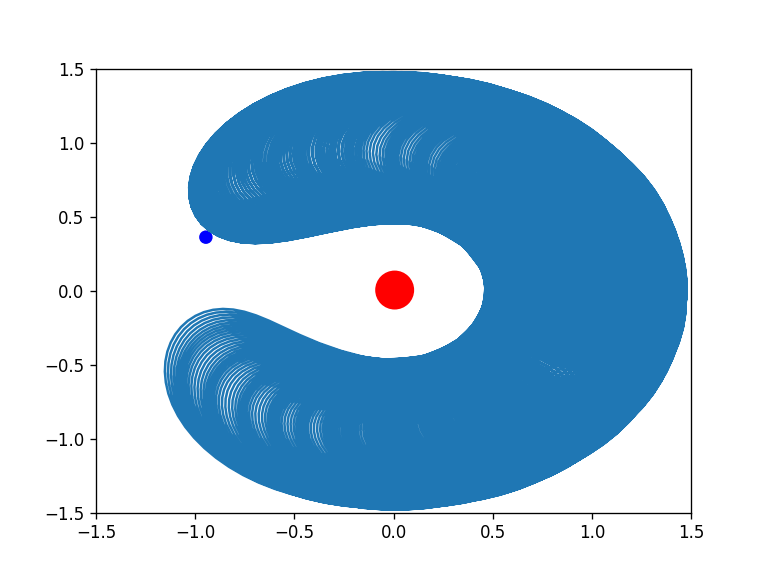

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


x_pos = [earth_pos[0,0],sun_pos[0,0],cruithne_pos[0,0]]
y_pos = [earth_pos[0,1],sun_pos[0,1],cruithne_pos[0,1]]
line_x = []
line_y = []
scat = ax.scatter(x_pos,  \
                  y_pos,   \
                  c=['b','r','g'], marker="o", s=[50,500,20])
line, = ax.plot(line_x,line_y)

def update(frame):
    
    x_pos = [earth_pos[frame,0],sun_pos[frame,0],cruithne_pos[frame,0]]
    y_pos = [earth_pos[frame,1],sun_pos[frame,1],cruithne_pos[frame,1]]
    scat.set_offsets(np.c_[x_pos,y_pos])
    
    line_x.append(cruithne_pos[frame,0])
    line_y.append(cruithne_pos[frame,1])
    line.set_data(line_x,line_y)
    return scat, line,


ani = animation.FuncAnimation(fig, update, blit=True,interval=1)
plt.show()

<IPython.core.display.Javascript object>


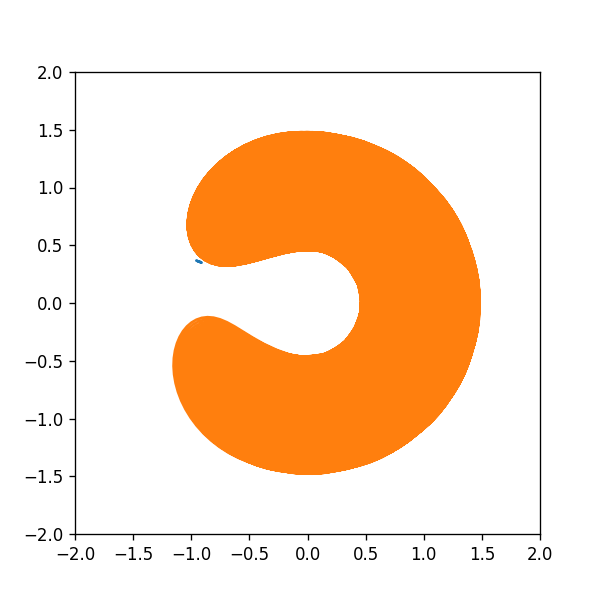

In [6]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(earth_pos[:,0],earth_pos[:,1]);
plt.plot(cruithne_pos[:,0],cruithne_pos[:,1]);